# Predicting car prices with K-Nearest Neighbors

The goal of this project is to predict a car's price using the K-Nearest Neighbors Algorithm. The dataset contiains information on various attributes of over 200 cars and can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/automobile).

In [13]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data = pd.read_csv('imports-85.data', names=cols)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

Because I will be using the K-Nearest Neighbors Algorithm to predict car prices, I need to ensure all columns in the dataset contain numeric values.  KNN uses Euclidean distance as a metric to determine the similarity of two observations based off of their attributes.  In order to calculate the Euclidean distance between two observations, all attributes need to be continuous values.

I will first make a new dataframe that only contains continous values as specifed in the [UC Irvine repo](https://archive.ics.uci.edu/ml/datasets/automobile).  I will then make sure these columns have been converted to 'int' or 'float' values and that all missing data has been removed. 

In [14]:
#Create new dataset that only contains continuous attributes
continuous_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
                  'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
knn_data = data[continuous_cols]
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [15]:
#Replace non-numeric values
knn_data = knn_data.replace('?', np.nan)

#Convert to float
knn_data = knn_data.astype('float')
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


In [16]:
#Remove rows where price is missing
knn_data = knn_data.dropna(subset=['price'])
knn_data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [17]:
#Evaluate missing data from other rows
cols_with_missing = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in cols_with_missing:
    print(knn_data[col].value_counts())
    print('\n')

161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
148.0     4
118.0     4
93.0      4
106.0     4
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized-losses, dtype: int64


3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.05     6
3.58     6
3.39     6
3.54     6
3.01     5
3.70     5
3.35     4
3.74     3
3.59     3
3.17     3
3.24     2
3.63     2
3.80     2
3.47     2
3.33     2
3.50     2
2.92     1
3.08     1
3.61     1
3.94     1
2.99   

For the remaining columns in this dataset, I will replace all null values with the column average rather than delete the rows.  I will inspect the values for the 'normalized_losses_avg' column to confirm the values were correctly updated.

In [18]:
normalized_losses_avg = knn_data['normalized-losses'].mean()
print('normalized-losses average: ' + str(normalized_losses_avg))

# Replace missing values in other columns with averages
knn_data = knn_data.fillna(knn_data.mean())

#Confirm that we went from 4 instances of 122.0 to 41 for the 'normalized-losses' column
knn_data.loc[knn_data['normalized-losses'] == normalized_losses_avg, 'normalized-losses'].count()

normalized-losses average: 122.0


41

In [19]:
knn_data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now that I have removed all missing values, I will normalize all columns except price so they are in the range of 0 to 1. It's important to normalize the data so that all attributes are equally weighted when calculating Euclidean distances.

In [20]:
#Save price column so we can add it back after normalization
price = knn_data['price']

#Normalize the dataframe
knn_data = (knn_data - knn_data.min()) / (knn_data.max() - knn_data.min())

#Add our original price column back to data
knn_data['price'] = price
knn_data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## KNN Analysis

I will now make a model that predicts the price of a car given its attributes using the K-Nearest Neighbors Algorithm.  First I will identify the individual features have the biggest impact in predicting a car's price. I will then identify the optimal number of features to factor into the model and the optimal k-value. Picking a good k-value is important as this represents the number of cars that are most similar to the one for which we are trying to predict the price.

Below, I have created a train_and_test function which encorporates all of the important steps of the analysis process. The function takes in a dataframe, splits the dataframe into a training set and a test set, makes predictions on the test set using the KNeighborsRegressor algorithm from Python's sklearn library, and then returns the root mean squared error as an accuracy metric.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#Function returns Root Mean Squared Error
def calculate_rmse(target, predictions):
    mse = mean_squared_error(target, predictions)
    return mse ** (1/2)

#Function returns predictions made with KNN model
def knn_predict(train, test, features, target, k=5):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[features], train[target])
    predictions = knn.predict(test[features])
    return predictions

def train_and_test(data, train_columns, target_column, k_values=5):
    #Split data into train and train and test sets
    np.random.seed(1)
    #Randomize order of rows in dataframe
    random_index = np.random.permutation(data.index)
    random_df = data.reindex(random_index)
    train_test_cutoff = int(len(random_df) / 2)
    train_df = random_df.iloc[:train_test_cutoff]
    test_df = random_df.iloc[train_test_cutoff:]
    
    #If / Else statement allows us to pass in multiple k-values at one time
    k_type = isinstance(k_values, list)
    if k_type:
        k_rmse_values = {}
        for k in k_values:
            predictions = knn_predict(train_df, test_df, train_columns, target_column, k)
            k_rmse_values[k] = calculate_rmse(test_df[target_column], predictions)
        return k_rmse_values
    else:
        predictions = knn_predict(train_df, test_df, train_columns, target_column, k_values)
        return calculate_rmse(test_df[target_column], predictions)

## Univariate model to determine which individual columns are best predictors

First, I will go through each continuous variable in the dataset to see which ones are most closely linked to car price.

In [22]:
feature_columns = list(knn_data.drop(['price'], axis=1).columns)

#For each individual column, calculate the RMSE when used to predict car prices
rmse_values = {}
for column in feature_columns:
    rmse = train_and_test(knn_data, [column], 'price')
    rmse_values[column] = rmse

rmse_series = pd.Series(rmse_values).sort_values()
rmse_series

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## Optimizing our K Value

Next, I will create a dictionary that shows how the RMSE changes for each variable as the k-value changes.

In [23]:
optimal_k_by_column = {}

for column in feature_columns:
    k_rmse_values = {}
    
    #Calculate RMSE for each column with k-values of 1 through 10
    for k in range(1, 11):
        k_rmse_values[k] = train_and_test(knn_data, [column], 'price', k)
    optimal_k_by_column[column] = k_rmse_values
optimal_k_by_column

{'normalized-losses': {1: 7846.750605148984,
  2: 6995.131629735551,
  3: 7500.5698123109905,
  4: 7021.331493118835,
  5: 7330.197653434445,
  6: 7673.178939792764,
  7: 7756.421586234123,
  8: 7714.914085041584,
  9: 7688.096096891432,
  10: 7643.35110370801},
 'wheel-base': {1: 4493.734068810494,
  2: 4442.179882547632,
  3: 5120.161506064513,
  4: 5487.831706127406,
  5: 5461.553997873057,
  6: 5450.864836232071,
  7: 5448.1070513823315,
  8: 5686.650799240269,
  9: 5738.405685192312,
  10: 5785.108559718025},
 'length': {1: 4628.45550121557,
  2: 5009.409196948803,
  3: 5129.8358210721635,
  4: 5191.789946422358,
  5: 5427.2009608367125,
  6: 5353.367715222768,
  7: 5313.427720847974,
  8: 5408.074004139666,
  9: 5383.054514833446,
  10: 5349.926225650312},
 'width': {1: 4559.257297950061,
  2: 4362.596086774093,
  3: 4606.413692169901,
  4: 4509.391428872318,
  5: 4704.482589704386,
  6: 4594.594316165793,
  7: 4571.485046194653,
  8: 4588.059575750665,
  9: 4652.914172067787,
  

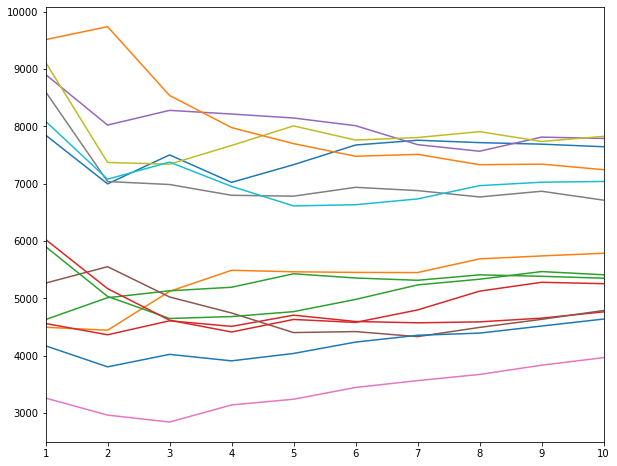

In [59]:
from matplotlib import pyplot

optimal_k_df = pd.DataFrame.from_dict(optimal_k_by_column)
optimal_k_df

optimal_k_df.plot(figsize=(10, 8), legend=False)

From the chart above, its interesting to note the change in RMSE's between the "good" predictors and the "bad" predictors. None of top 8 columns with the lowest RMSE's have a value below 6000 regardless of k-value. As we increase the k-value, the RMSE initially drops but slowly starts to increase once we hit a k-value of 3 or 4.  The bottowm 6 columns with the highest RMSE's all start off with significantly higher RMSE's that continuously drop as we increase the k-value.  There is still, however, a significant gap between the lowest RMSE in the "bad" group compared to the highest RMSE in the "good" group. 

Taking this graph into consideration, I will remove the "bad" predictors from our analysis and only take into consideration the 8 columns with the lowest RMSE's which were engine-size, horsepower, curb-weight, highway-mpg, width, city-mpg, length and wheel-base.

## Using a multivariate model to improve predictions

I now want to find optimal number of features to include in the model.  So far we've only looked at the predictive power of 1 feature at a time, however, its reasonable to assume that combining multiple factors will decrease our RMSE even further.

In [53]:
#List of best features from the previous section
best_features_by_rmse = ['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg', 'length', 'wheel-base']

average_rmse_by_feature = {}
for col in best_features_by_rmse:
    average_rmse = np.mean(list(optimal_k_by_column[col].values()))
    average_rmse_by_feature[col] = average_rmse
average_rmses = pd.Series(average_rmse_by_feature).sort_values()
average_rmses

engine-size    3391.092864
horsepower     4207.168580
width          4591.181459
curb-weight    4763.975507
highway-mpg    4988.282518
city-mpg       5144.573396
length         5219.454161
wheel-base     5311.459809
dtype: float64

In [54]:
#Function that returns a list of the best X features from the list
def get_best_x_features(x):
    return list(best_features_by_rmse[:x])

In [58]:
x_best_feature_rmse = {}

#Calculate RMSE for the top-2 through top-8 features in our analysis
for i in range(2, 9):
    features = get_best_x_features(i)
    print(features)
    rmse = train_and_test(knn_data, features, 'price')
    x_best_feature_rmse[str(i)] = rmse
x_best_feature_rmse

['engine-size', 'horsepower']
['engine-size', 'horsepower', 'curb-weight']
['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']
['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg']
['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg', 'length']
['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg', 'length', 'wheel-base']


{'2': 2949.8817277180374,
 '3': 3435.2601095401815,
 '4': 3286.5597353252815,
 '5': 3410.2170133901805,
 '6': 3416.5360733634966,
 '7': 3359.9444892279203,
 '8': 3647.155382671067}

Its interesting to note the fluctuating relationship between RMSE and the number of best features used in the analysis. We also need to take into consideration that all of these RMSE's resulted from predictions that used a default k-value of 5. Previously we saw that a k-value of 3 or 4 would be more optimal than a value of 5. Below I will play around with k-values to see how this affects our multivariate model.

## Optimizing K-value for our multivariate model

In [62]:
optimal_k_by_num_features = {}

for num_columns in range(2,9):
    features = get_best_x_features(num_columns)
    
    k_rmse_values = {}
    for k in range(1, 11):
        k_rmse_values[k] = train_and_test(knn_data, features, 'price', k)
    optimal_k_by_num_features[str(num_columns) + ' best features'] = k_rmse_values

optimal_k_by_num_features

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937},
 '3 best features': {1: 3131.798233957262,
  2: 3005.5737903777945,
  3: 3016.72346189447,
  4: 3144.445503247916,
  5: 3435.2601095401815,
  6: 3490.638342356411,
  7: 3734.328302612299,
  8: 3936.1203798667007,
  9: 3976.4878693193755,
  10: 4124.277723900439},
 '4 best features': {1: 2927.820116343107,
  2: 2600.431466008274,
  3: 2799.0983199667144,
  4: 3074.9999988931822,
  5: 3286.5597353252815,
  6: 3705.1702717384333,
  7: 3822.180444798032,
  8: 3986.7014080509525,
  9: 4210.340136384571,
  10: 4213.315457869819},
 '5 best features': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8: 3848

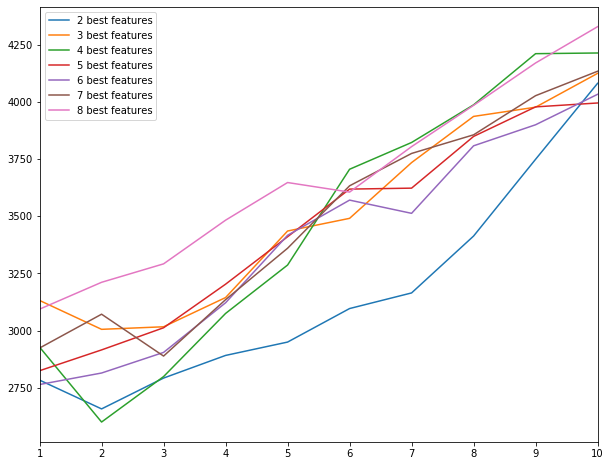

In [63]:
optimal_k_multivar_df = pd.DataFrame.from_dict(optimal_k_by_num_features)
optimal_k_multivar_df

optimal_k_multivar_df.plot(figsize=(10, 8))

## Conclusion

In our multivariate model, it looks like an optimal K-Value would be either 2 or 3. Going forwrad there are two major tweaks I would like to make to this analyis:

1. I want to play around with different combinations of top-features rather than only grouping them by top individual performance. Some of the features might contain relatively similar information so it would be better to group features that take into account many different aspects of the car rather than simply lumping together features that performed the best on their own.

2. I want to further analyze the engine-size and horsepower columns and see what sort of impact it would have to drop one of these. It seems like these two columns contain very similar informtaion, which could easily make our error metric unrealistically low for any model that contians both of these features.